# Business Case: healthyfi.me
healthyfi.me has labelled its customers based on the highest intensity of work they could perform, namely, `A`, `B`, `C` and `D`.

Given a new customer, help healthyfi.me in recommending customized workout plans by predicting the customer's class.

### Data dictionary
| id | features | description |
| :-: | :-: | :-: |
| 01 | `age` | age of the customer |
| 02 | `gender` | gender of the customer (M/F) |
| 03 | `height_cm` | height of the customer in cm |
| 04 | `weight_kg` | weight of the customer in kg |
| 05 | `body_fat_`% | % of fat in customer's body |
| 06 | `diastolic` | diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats |
| 07 | `systolic` | systolic blood pressure, measures the pressure in your arteries when your heart beats |
| 08 | `gripForce` | strength of customer's grip |
| 09 | `sit and bend forward_cm` | to measure flexibility of customer |
| 10 | `sit-ups counts` | count of sit-ups customer can perform |
| 11 | `broad jump_cm` | It is the max jump customer can perform in cm |
| 12 | `class` | Category of customer based on the intensity of workout |

# Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading The Dataset

In [ ]:
df = pd.read_csv("healthyfime.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


Observations from the above snippet of the data,
- The `age` feature is very crucial in predicting the class of highest intensity workout.
- Features like, `height`, `weight`, `diastolic`, etc are crucial in predicting the workout intensity. The reason: A high intensity cannot be predicted to candidates with high blood pressure.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


# EDA
- `gender` has 2 unique values and `class` has 4 unique values.
- Binary encoding (`0` and `1`) can be applied on `gender`.
- Since `class` is ordinal in nature, label encoding (`0`, `1`, `2`, `3`) can be applied on it.

In [ ]:
# df["gender"].replace({"M": 0, "F": 1}, inplace = True)
# df.head()
df.replace({"M": 0, "F": 1}, inplace = True)
df.head()

/var/folders/xl/sjrt7p6548j9h6x1rz_px87w0000gn/T/ipykernel_41446/3792586169.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"M": 0, "F": 1}, inplace = True)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
classes = list(df["class"].unique())
mapping_dict = {ch: i for i, ch in enumerate(sorted(classes, reverse = True))}
print(mapping_dict)

{'D': 0, 'C': 1, 'B': 2, 'A': 3}


In [ ]:
df["class"].replace(mapping_dict, inplace = True)
df.head()

/var/folders/xl/sjrt7p6548j9h6x1rz_px87w0000gn/T/ipykernel_41446/140115674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["class"].replace(mapping_dict, inplace = True)
/var/folders/xl/sjrt7p6548j9h6x1rz_px87w0000gn/T/ipykernel_41446/140115674.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


In the above step,
- All the strings are mapped to the integers in a reversed manner, i.e., `D` is mapped to `0` and `A` is mapped to `3`.
- Then all the values in the `class` features are replaced with the mapped values.

# Correlations

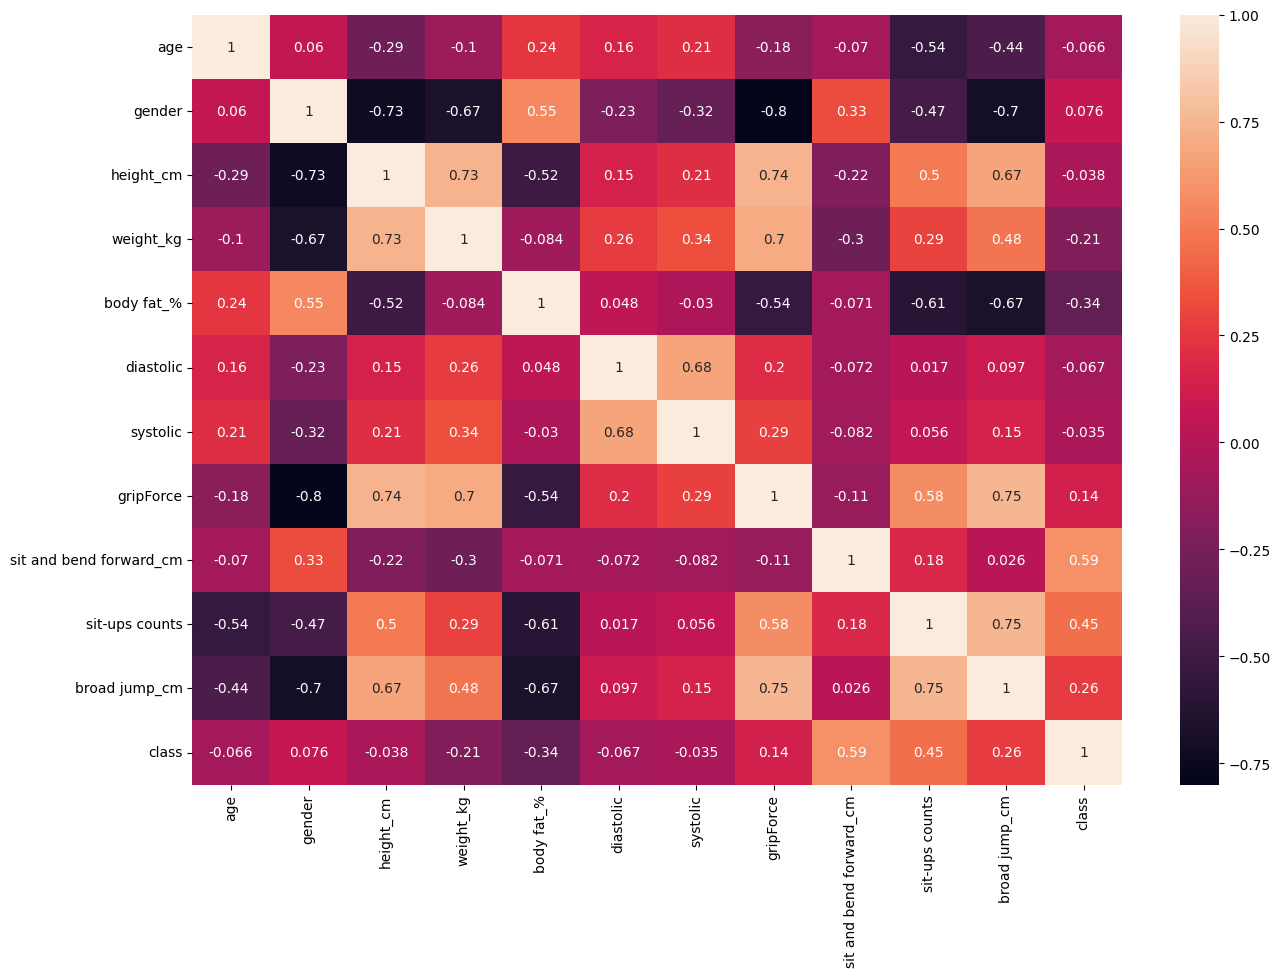

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

There are no storng correlations between any of the features.

A Boxplot can be used to understand the range and distribution of all variables.

<function matplotlib.pyplot.show(close=None, block=None)>

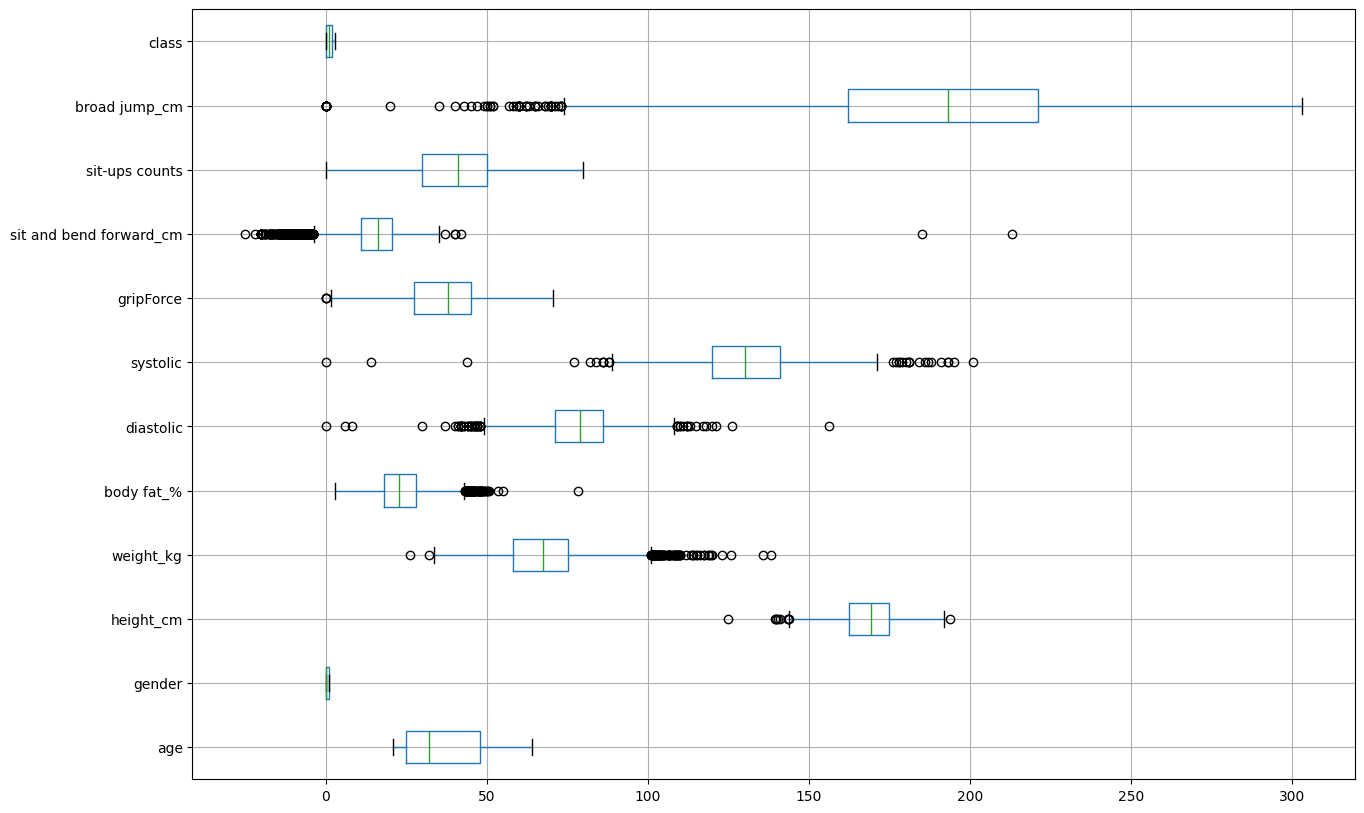

In [ ]:
plt.figure(figsize = (15, 10))
df.boxplot(rot = 0, vert = False)
plt.show

# Separating The Independent And Dependent Variables

In [ ]:
x = df.drop(columns = ["class"])
y = df["class"]
x.shape, y.shape

((13393, 11), (13393,))

# Split The Data Into Train, Test And Validation

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((10847, 11), (10847,), (1206, 11), (1206,), (1340, 11), (1340,))

# Scaling The Data Using `StandardScaler`

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train, y_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

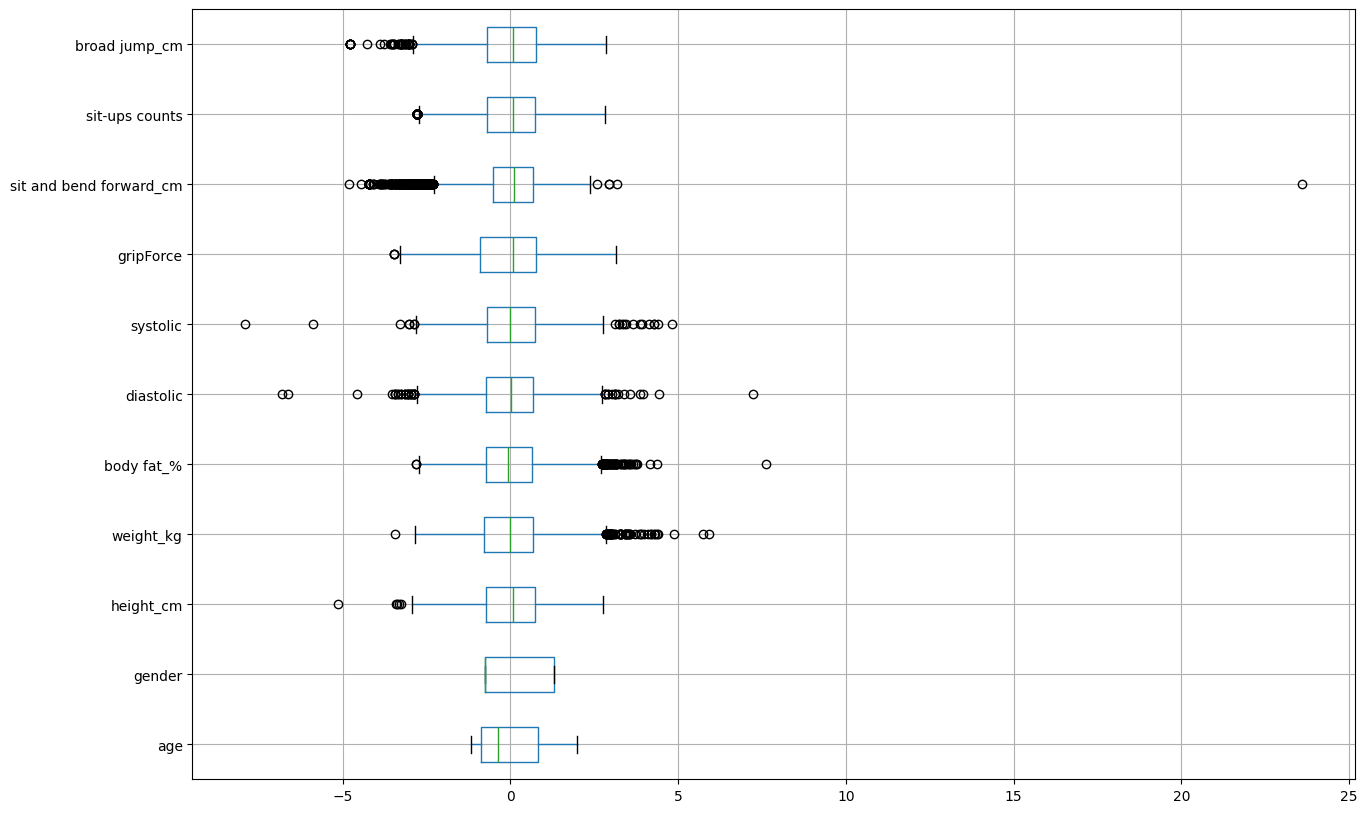

In [ ]:
plt.figure(figsize = (15, 10))
pd.DataFrame(x_train, columns = df.columns[:-1]).boxplot(rot = 0, vert = False)
plt.show()

The data is ready for model building.

# Tensorflow

In [ ]:
# importing tensorflow
import tensorflow as tf

# checking the version of tensorflow
tf.__version__

'2.18.0'

### What is TensorFlow?
TensorFlow (`tensorflow`) is a powerflow open-source library developed by Google for Machine Learning and Artificial Intelligence. It is designed to make it easier to build and train complex Neural Networks

Key features:
- Data flow graphs: TensorFlow uses a computational graph approach, where nodes represent mathematical operations and edges represent the data (tensors) flowing between them. This allows for efficient execution on various hardware platforms.
- Flexible architecture: It can run on a single device (CPU or GPU) or be scaled to distributed systems with multiple GPUs or TPUs.
- High-level API (Keras (`keras`)): Keras, integrated into TensorFlow, provides a user-friendly interface for building and training models, making it accessible to both beginners and experienced developers.
- Low-level API (TensorFlow Core): For advanced users, TensorFlow Core offers fine-grained controls over the underlying computations, allowing for custom optimizations and experimentation.
- Wide range of applications: TensorFlow is used for various tasks, including image recognition, natural language processing, speech recognition and more.

TensorFlow modules,
- `tf.keras`
- `tf.data`

# `tf.keras`

### What is Keras?
Keras is a high-level Neural Network API that runs on top of TensorFlow (and other backends like Theano and CNTK). It is designed to be user-friendly and flexible, making it a popular choice for both beginners and experienced Machine Learning practitioners.

Key features,
- User-friendly API: Kerasa provides a simple and intuitive API, making it easy to build and train Neural Networks.
- Modularity: Keras is built on the principle of modularity, which allows to easily combine different componenta (layers, optimizers, etc) to create complex models.
- Flexibility: While it offers a high-level API, Keras also provides access to the underlying TensorFlow backend for more advanced customization.
- Rapid prototyping: Keras is designed to enable rapid experimentation and model development.
- Cross-platform compatibility: Keras can run on various hardware platforms including CPUs, GPU and TPUs.

### How is it different from TensorFlow?
While both Keras and TensorFlow are powerful tools for machine learning, they differ in their level of abstraction and complexity.

TensorFlow,
- Low-level API: It provides a low-level API, giving you fine-grained control over the underlying computations. This allows for highly customized and optimized models.   
- Flexibility: You can build complex and custom architectures, but it requires a deeper understanding of machine learning concepts and TensorFlow's framework.   
- Scalability: TensorFlow is designed to handle large-scale datasets and complex models, making it suitable for research and production environments.

Keras,
- High-level API: It offers a simpler and more user-friendly API, making it easier to build and train models quickly.   
- Ease of use: Keras abstracts away many of the complexities of deep learning, allowing you to focus on model architecture and training.   
- Rapid prototyping: It's ideal for rapid prototyping and experimentation.

In essence, Keras is built on top of TensorFlow. It provides a higher-level interface that simplifies the process of building and training neural networks. You can think of Keras as a user-friendly wrapper around TensorFlow.

When to use which,
- Keras: Ideal for beginners and rapid prototyping.   
- TensorFlow: Suitable for advanced users who need more control over the underlying computations and for large-scale, complex models.

### Advantages of Keras in TensorFlow
- Simplified API: Keras offers a user-friendly API that significantly reduces the complexity of building and training deep learning models. It is designed to be intuitive and easy to learn even for beginners.
- Seamless integration: Keras is now directly integrated into TensorFlow 2, eliminating the need for separate installation. This streamlined process makes it even more accessible to developers.
- Rapid prototyping: Keras' high-level abstractions enable rapid experimentation and model development, which allows to quickly iterate on ideas and explore different architectures.
- Flexibility: While Keras provides a simple interface for common tasks, it also offers flexibility for advanced users who need to customize their models or delve into the underlying TensorFlow operations.
- Broad community support: Keras has a large and active community, providing extensive documentation, tutorials and forums for support and knowledge sharing.

The following are the various activation functions available inside Keras,

In [ ]:
dir(tf.keras)

['DTypePolicy',
 'FloatDTypePolicy',
 'Function',
 'Initializer',
 'Input',
 'InputSpec',
 'KerasTensor',
 'Layer',
 'Loss',
 'Metric',
 'Model',
 'Operation',
 'Optimizer',
 'Quantizer',
 'Regularizer',
 'Sequential',
 'StatelessScope',
 'SymbolicScope',
 'Variable',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'config',
 'constraints',
 'datasets',
 'device',
 'distribution',
 'dtype_policies',
 'export',
 'initializers',
 'layers',
 'legacy',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'name_scope',
 'ops',
 'optimizers',
 'preprocessing',
 'quantizers',
 'random',
 'regularizers',
 'tree',
 'utils',
 'version',
 'visualization']

In [ ]:
dir(tf.keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'celu',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'glu',
 'hard_shrink',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'hard_tanh',
 'leaky_relu',
 'linear',
 'log_sigmoid',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'soft_shrink',
 'softmax',
 'softplus',
 'softsign',
 'squareplus',
 'swish',
 'tanh',
 'tanh_shrink']

# `tf.data`

In [ ]:
dir(tf.data)

['AUTOTUNE',
 'Dataset',
 'DatasetSpec',
 'FixedLengthRecordDataset',
 'INFINITE_CARDINALITY',
 'Iterator',
 'IteratorSpec',
 'NumpyIterator',
 'Options',
 'TFRecordDataset',
 'TextLineDataset',
 'ThreadingOptions',
 'UNKNOWN_CARDINALITY',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'experimental']

There are 2 ways using which code can be written in Keras,
1. Sequential API.
2. Functional API.

For the sake of this document, the Seqential API is used.

# Keras Sequential API
The Sequential API in Keras is a straightforward way to define a neural network model by stacking layers sequentially. It's ideal for simple, linear models where the output of one layer feeds directly into the input of the next.

### Limitations of Sequential API:
While the Sequential API is simple and easy to use, it's not suitable for complex architectures with shared layers, multiple inputs, or multiple outputs. For these cases, you'll need to use the more flexible Functional API.

The following is done in the code lines below,
- The `Sequential` class from `tnsorflow.keras.models` is imported in which the layers of the Neural Network are sequentially positioned.
- The `Dense` layer is also imported from `tensorflow.keras.layers`. A `Dense` layer helps in defining one layer of a feed forward Neural Network. In a `Dense` layer, every neuron is connected to every neuron in the preceding layer, hence the name "dense." This ensures that each neuron considers the input from all previous neurons.

<img src = "../artifacts/neural_networks_57.png" alt = "drawing" width = "500">

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

The following is done in the code lines below,
- An instance (object) of the `Sequential` class is created with the name `model`.
- It is same as creating an instance as was done in `sklearn`, just that, in this case, the model is defined as well.
- `Sequential` model will take a list of layers as arguments.

In [ ]:
# defining a feed forward network with a single hidden layer
model = Sequential(
    [
        Dense(64, activation = "relu"), # hidden dense layer with 64 neuron units
        Dense(4, activation = "softmax") # output layer wit 4 units and softmax activation
    ]
)
# the activation argument is optional, if it is not passed, then there will linear or no activation

### Why is activation function needed?
It provides non-linearity to problems.

### In what case, an activation function will not be passed?
Output layer of regression model.

### How to find if there is a method to check the weights of a model?
`dir(model)`

In [ ]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_allow_non_tensor_positional_args',
 '_api_export_path',
 '_api_export_symbol_id',
 '_assert_compile_called',
 '_assert_input_compatibility',
 '_assign_variable_values',
 '_auto_config',
 '_build_by_run_for_kwargs',
 '_build_by_run_for_single_pos_arg',
 '_build_shapes_dict',
 '_call_has_mask_arg',
 '_call_has_training_arg',
 '_call_signature',
 '_called',
 '_check_quantize_args',
 '_check_super_called',
 '_checkpoint_adapter',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_clear_previous_trainer_metrics',
 '_compile_loss',
 '_c

### Checking the model weights

In [ ]:
model.weights

[]

The above output means that the model has not created weights yet.

### Input shape
- Since the model does not know about the input size yet, tensorflow does not have any information to create weights and biase yet.
- the input size can be passed as an argument in the first layer.

In [ ]:
model = Sequential(
    [
        Dense(64, activation = "relu", input_shape = (11, )),
        Dense(4, activation = "softmax")
    ]
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In the above code,
- 1 training example will be a 11 dimensional feature vector `(11, )`.
- For each of the feature vector from the input, there will be an output of 64-dimensional feature vector `(64, )`.
- In case of a `Dense` layer, $y = x * w + b$, where $x$ has all the features as columns.
- The output of the first layer will have the dimensions `(m, 64)`, where `m` is the number of input data samples.

In [ ]:
# the weights will be created now
print(model.weights)

[<Variable path=sequential_1/dense_2/kernel, shape=(11, 64), dtype=float32, value=[[ 0.20117629  0.01485234  0.14386871 -0.06559108  0.01909474  0.06163284
   0.12189671 -0.11015238 -0.14555223 -0.0565103   0.10104406 -0.0094974
   0.2721382  -0.17542523  0.12882972  0.15961653  0.15496144 -0.15060371
   0.0105516  -0.21615925  0.25284353 -0.20081295 -0.15880671 -0.21509454
  -0.17437157 -0.20847012  0.20440581  0.13800687  0.04909414 -0.25166672
  -0.0702565   0.17647398 -0.27184463  0.23786637 -0.02344465  0.02627227
  -0.23587117 -0.01056862  0.10910895  0.27758083 -0.006356   -0.12843136
   0.1783132  -0.06462771 -0.02696604  0.0347541   0.2005944  -0.04212783
   0.01754576  0.00546008 -0.05868407  0.06863415 -0.15010975 -0.13290574
  -0.1346865  -0.17253181 -0.17524269  0.23821118  0.04554424 -0.20738691
  -0.11562844 -0.12756652 -0.07077056  0.06041598]
 [-0.15554555 -0.17783341  0.13277674 -0.22130388  0.15553191 -0.09911287
  -0.07876343 -0.09171492  0.07890943  0.21837124 -0.2

In [ ]:
type(model.weights)

### Why were weights not defined in second `Dense' layer?
The layers in the sequential model interact with each other. Therefore, there is no need to define the input shape for all the layers.